In [1]:
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from PIL import Image
import cv2

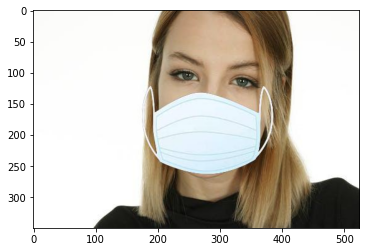

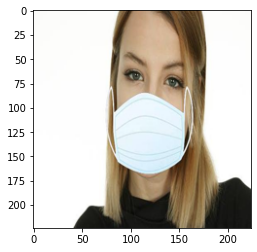

In [2]:
 img = image.load_img("test/1-with-mask.jpg")
 plt.imshow(img)
 plt.show()
 cv2.imread("test/1-with-mask.jpg").shape
 im1 = img.resize((224,224))
 plt.imshow(im1)
 

In [15]:
mask_training = "train"
training_datagen = ImageDataGenerator(rescale = 1/255, horizontal_flip = True,rotation_range=30,fill_mode='nearest')
mask_validation = "validation"
validation_datagen = ImageDataGenerator(rescale = 1/255)

mask_train_generator = training_datagen.flow_from_directory(mask_training,target_size=(224,224),class_mode='categorical',batch_size = 64)

mask_validation_generator = validation_datagen.flow_from_directory(mask_validation, target_size=(224,224), class_mode='categorical', batch_size= 16)

Found 1315 images belonging to 2 classes.
Found 191 images belonging to 2 classes.


In [16]:
model_mask = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224,224, 3)),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model_mask.compile(loss='categorical_crossentropy',
optimizer=Adam(learning_rate=0.0001),
metrics=['acc'])


In [17]:
history = model_mask.fit(mask_train_generator,steps_per_epoch = 15,epochs = 50,
                            validation_data = mask_validation_generator,validation_steps = 15)

Epoch 1/50
15/15 [==============================] - 60s 4s/step - loss: 0.6006 - acc: 0.7035 - val_loss: 0.3211 - val_acc: 0.9005
Epoch 2/50
15/15 [==============================] - 43s 3s/step - loss: 0.2469 - acc: 0.9205
Epoch 3/50
15/15 [==============================] - 39s 3s/step - loss: 0.1396 - acc: 0.9495
Epoch 4/50
15/15 [==============================] - 39s 3s/step - loss: 0.1144 - acc: 0.9573
Epoch 5/50
15/15 [==============================] - 40s 3s/step - loss: 0.1108 - acc: 0.9560
Epoch 6/50
15/15 [==============================] - 41s 3s/step - loss: 0.1412 - acc: 0.9469
Epoch 7/50
15/15 [==============================] - 37s 2s/step - loss: 0.1177 - acc: 0.9624
Epoch 8/50
15/15 [==============================] - 40s 3s/step - loss: 0.0793 - acc: 0.9753
Epoch 9/50
15/15 [==============================] - 40s 3s/step - loss: 0.0830 - acc: 0.9764
Epoch 10/50
15/15 [==============================] - 40s 3s/step - loss: 0.0892 - acc: 0.9708
Epoch 11/50
15/15 [=============

In [18]:
model_mask.save('mask_detection.h5')

In [19]:
from keras.models import load_model
model_mask = load_model('D:\Rishik\VIT\sem4\FAI\j comp\maskdetection\mask_detection.h5')

Average Accuracy : 0.9761990487575531


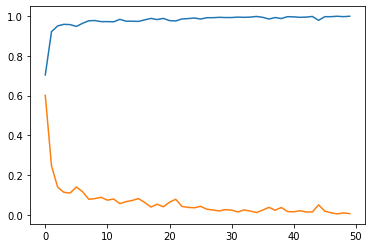

In [20]:
accs = history.history['acc']
print("Average Accuracy :",sum(accs)/len(accs))
plt.plot(accs)

loss = history.history['loss']
plt.plot(loss)

In [21]:
def detect(str,flag):
    if(flag == True):
        return "Detected " + str
    
    else:
        return "Didn't detect " + str

1-with-mask.jpg
Detected mask


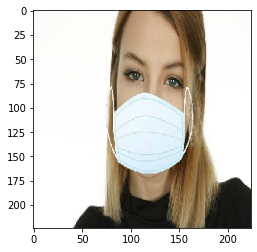

11-with-mask.jpg
Detected mask


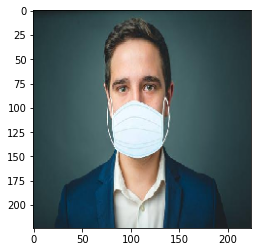

161.jpg
Didn't detect mask


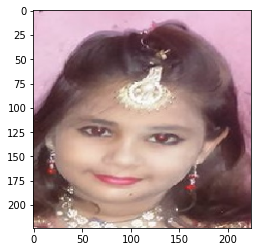

166.jpg
Didn't detect mask


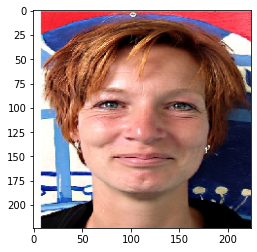

168.jpg
Didn't detect mask


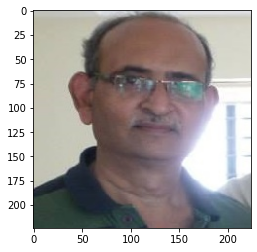

23-with-mask.jpg
Detected mask


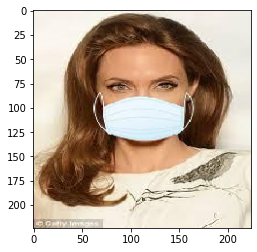

25-with-mask.jpg
Detected mask


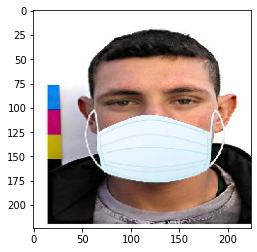

31.jpg
Didn't detect mask


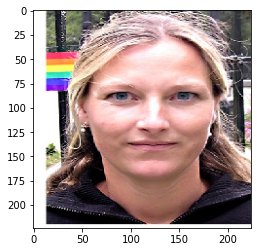

37.jpg
Didn't detect mask


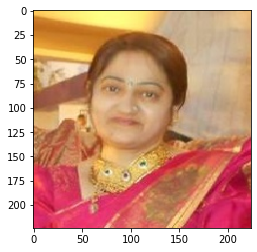

39.jpg
Didn't detect mask


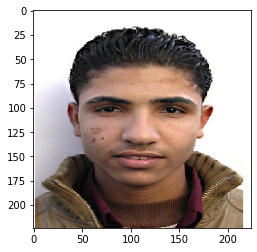

5-with-mask.jpg
Detected mask


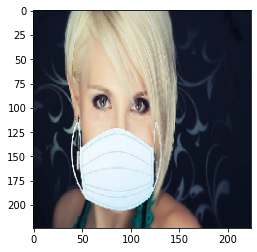

57-with-mask.jpg
Detected mask


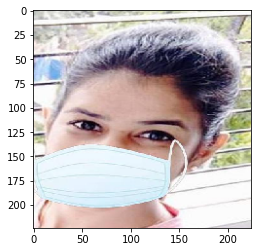

62-with-mask.jpg
Detected mask


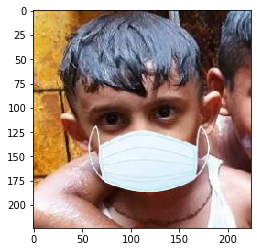

73-with-mask.jpg
Detected mask


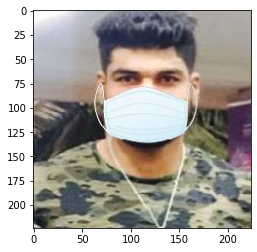

78-with-mask.jpg
Detected mask


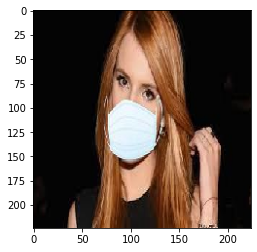

84-with-mask.jpg
Detected mask


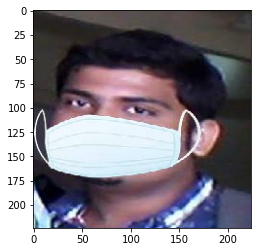

89.jpg
Didn't detect mask


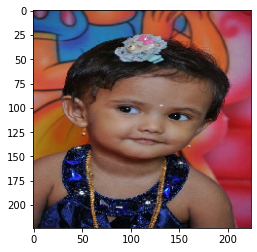

93.jpg
Didn't detect mask


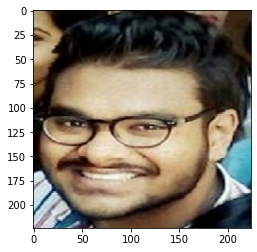

99.jpg
Didn't detect mask


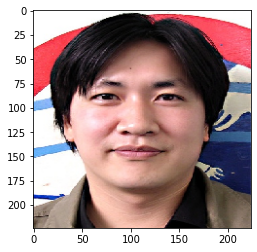

In [22]:
import numpy as np
import os
from matplotlib import pyplot as plt
path = 'test'
for i in os.listdir(path):
    img = image.load_img(path + '/' + i, target_size = (224,224))
    print(i)
    plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255
    classes = model_mask.predict(x)
    mask_flag = detect("mask",np.argmax(classes[0]) == 0 )
    print(mask_flag)
    plt.show()